In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# NLTK Resources

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Load Dataset

In [3]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

fake["label"] = 0
real["label"] = 1

df = pd.concat([fake, real], axis=0).sample(frac=1).reset_index(drop=True)


# Preprocessing

In [4]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # remove non-alphabets
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df["content"] = df["title"] + " " + df["text"]
df["clean_text"] = df["content"].apply(preprocess)

# TF-IDF Vectorization

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]

# Train Test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [7]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Support Vector Machine

In [8]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation

In [9]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.9884187082405346
F1 Score: 0.9878646441073512
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4707
           1       0.99      0.99      0.99      4273

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [10]:
print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM:
Accuracy: 0.9948775055679288
F1 Score: 0.9946148442987591
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4707
           1       1.00      0.99      0.99      4273

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Word Clouds

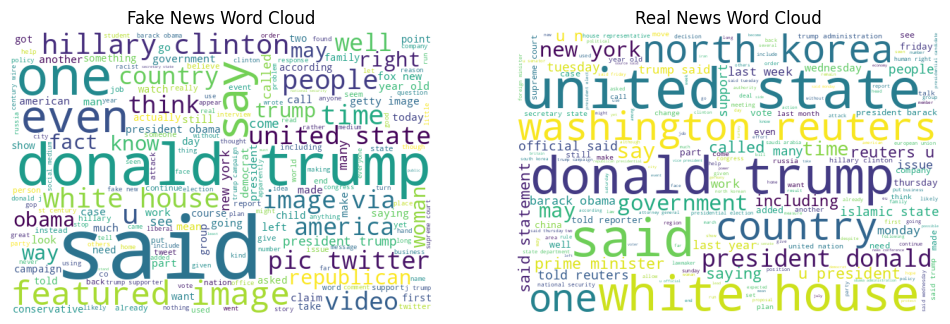

In [11]:
fake_text = " ".join(df[df.label == 0]["clean_text"])
real_text = " ".join(df[df.label == 1]["clean_text"])

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Fake News Word Cloud")
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(fake_text))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Real News Word Cloud")
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(real_text))
plt.axis("off")

plt.show()